# Philharmonia basics

In [1]:
import sys
sys.path.append('..')

In [2]:
import warnings
warnings.simplefilter('ignore', UserWarning)

In [3]:
import IPython.display as display
import librosa
import matplotlib.pyplot as plot
import numpy as np

from philharmonia import dataframe, datafile

## Load data

In [4]:
data = dataframe()

data.head()

,Unnamed: 0,file,bytes,name,instrument,percussion,note,octave,pitch,length,dynamic,style
0,0,cello/cello_F2_phrase_mezzo-forte_arco-detache...,186722,cello_F2_phrase_mezzo-forte_arco-detache,cello,False,F,2.0,87.31,phrase,mezzo-forte,arco-detache
1,1,cello/cello_As2_05_forte_arco-normal.mp3,12119,cello_As2_05_forte_arco-normal,cello,False,A#,2.0,116.54,05,forte,arco-normal
2,2,cello/cello_F5_15_fortissimo_arco-normal.mp3,23091,cello_F5_15_fortissimo_arco-normal,cello,False,F,5.0,698.46,15,fortissimo,arco-normal
3,3,cello/cello_D5_025_pianissimo_arco-normal.mp3,7732,cello_D5_025_pianissimo_arco-normal,cello,False,D,5.0,587.33,025,pianissimo,arco-normal
4,4,cello/cello_C3_1_fortissimo_arco-normal.mp3,17762,cello_C3_1_fortissimo_arco-normal,cello,False,C,3.0,130.81,1,fortissimo,arco-normal


## Plot sound sample

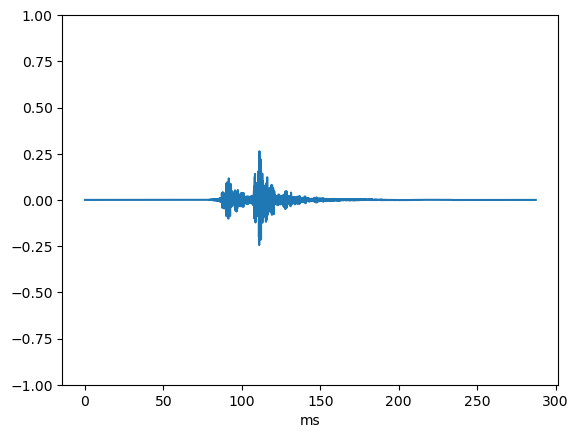

In [5]:
samples = data[(data.percussion == True) & (data.bytes > 1024)]
sample = samples[samples.bytes == samples.bytes.min()].iloc[0]

x, sr = librosa.load(datafile(sample.file), sr=None, mono=True)
t = librosa.samples_to_time(range(x.size), sr=sr) * 1e3

plot.plot(t, x);
plot.xlabel('ms');
plot.ylim(-1, +1);

display.Audio(x, rate=sr)

## Query instruments

In [6]:
data.query("percussion==False").filter(['instrument']).sort_values(['instrument']).drop_duplicates()

,instrument
1854,banjo
1171,bass-clarinet
4476,bassoon
0,cello
5267,clarinet
8069,contrabassoon
7280,double-bass
9688,english-horn
13392,flute
11180,french-horn
